### Computational Guided Inquiry for PChem (Neshyba, 2021)


# Freezing Point Depression


## Introduction

The phrase *Freezing Point Depression* describes an effect in which a solvent, when it contains dissolved solutes, freezes at a lower temperature than the pure solvent would. Freezing point depression is the principle behind the salting of roads in winter, and the making of ice cream!

It turns out that freezing point depression is closely tied to another effect, namely the reduction in a solvent's equilibrium vapor pressure, $P_A$, due to the presence of dissolved solute $B$. This effect, called *Raoult's Law*, is described graphically in Figure 1.

<p style='text-align: center;'>
<img src="Freezing Point Depression.png" height="500" width="500"/>

__Figure 1__. Phase diagram of water showing the effect of Raoult's Law on the liquid-vapor phase boundary. 
</p>

Here, our goal is to put this relationship on a quantitative basis. To do that, we'll explore two methods: one we'll call the *Intersection Method*, and another known as *Blagden's Law*. 

### The Raoult Method for finding freezing point depression

We first define the mole fraction of solvent, $A$, in a soution containing solute $B$,

$$
\chi_A = \frac 1 {1 + M_A b_B} \ \ \ \ (1)
$$

where $b_B$ is $B$'s *molality* (typically expressed as $\frac {mol B}{kg A}$) and $M_A$ is $A$'s *molar mass* ($\frac {kg A}{mol A}$). *Raoult's Law* says the new equilibrium vapor pressure of solvent A, $P_A$ is related to the vapor pressure above pure solvent, $P_A^*$, according to

$$
P_A = P_A^*\chi_A \ \ \ \ (2)
$$

Since $\chi_A<1$, the dashed green line in Figure 1 lies below the solid green line. And where that dashed green line intersects with the solid-vapor equilibrium curve, that's the new freezing temperature! That means there's a freezing point reduction, 

$$
\Delta T_F = T_{Raoult}-T_3 \ \ \ \ (3)
$$

indicated by the arrow in Figure 1. Defined this way, $\Delta T$ is a negative number.

### Blagden's Law
It turns out that the Raoult method just described is the basis of a simple, approximate analytical relationship, called *Blagden's Law*,

$$
\Delta T_F = -i K_A \times b \ \ \ \ (4)
$$

where $i$ is called the *van't Hoff factor*, which depends on the solute, and $K_A$ is called the *cryoscopic constant*, which depends on the solvent. It turns out that every solvent has its own $K_A$ (and you can find tables listing them). Here we'll focus on its theoretical value,

$$ 
K_A = \frac {R \times M \times T_f^2}{\Delta H_{fus}} \ \ \ \ (5)
$$

As for $i$, for our present purposes we'll just say $i=1$, which is a fair approximation for non-ionic solutes like sugar. But there's an interesting back-story to this, especially when the solute is an ionic substance: for $NaCl$, for example, $i\approx2$. van't Hoff was the first winner of the Nobel Prize in Chemistry (see https://en.wikipedia.org/wiki/Jacobus_Henricus_van_'t_Hoff) for this and related work.

## Learning Objectives
- What Raoult's Law is, and how to use it
- How Raoult's Law allows one to predict freezing point depression
- How to predict a solvent's cryoscopic constant, $K_A$
- How to use Blagden's Law to predict freezing point depression

In [7]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

In [8]:
# Gas constant in SI units
R = AssignQuantity(8.314,'J/mol/K'); print(R)

# Triple point of water
T3 = AssignQuantity(273.16,'K'); print(T3)
P3 = AssignQuantity(612,'Pa'); print(P3)

# Molar mass of water
M = AssignQuantity(18,'g/mol')

# Enthalpy of vap and sub
DHvap = AssignQuantity(44,'kJ/mol')
DHsub = AssignQuantity(50,'kJ/mol')

8.314 joule / kelvin / mole
273.16 kelvin
612 pascal


### Define an extended (supercooled or superheated) Clausius-Clapeyron function
The function below is provided for you and can be run as-is. But if you want to see a different amount of superheating or cooling in your graphs below, you can alter the first few lines to suit you.

In [9]:
def Clausius_Clapeyron_super(T,T3,P3,DH,R,AssignQuantity):
    """ This function calculates Clausius-Clapeyron curves past the triple point"""
    
    # The numbers here determine how much superheating or supercooling we want to see
    superheat = AssignQuantity(5,'K')
    supercool = AssignQuantity(5,'K')

    # Decide on whether we're superheating or supercooling, and extend appropriately
    if T < T3:
        print('Superheating ...')
        T_array = AssignQuantity(np.linspace(T,T3+superheat),T.units)
    else:
        print('Supercooling ...')
        T_array = AssignQuantity(np.linspace(T3-supercool,T),T.units)
    R.ito('J/mol/K')
    DH.ito('J/mol')
    P_array = P3*np.exp(-DH/R*(1/T_array-1/T3))
    print('Units of resulting temperature:', T_array.units)
    print('Units of resulting pressure:', P_array.units)

    # Return the temperature and pressure arrays
    return T_array, P_array

### Using the extended Clausius-Clapeyron equation
The first line below uses Clausius_Clapeyron_super to calculate $P_{H_2O,liq}^*$ *up* to 278 K. The temperature range starts a few degrees below $T_3$, because this is *super* Clausius-Clapeyron! 

Add another line that uses Clausius_Clapeyron_super to calculate $P_{H_2O,ice}^*$ *down* to 268 K. For compatibility with subsequent cells, call the resulting arrays T_sv and P_sv.

In [10]:
# Call Clausius_Clapeyron for the liquid->vapor phase boundary, going up to 278 K.
T_lv, P_lv = Clausius_Clapeyron_super(AssignQuantity(278,'K'),T3,P3,DHvap,R,AssignQuantity)

# Call Clausius_Clapeyron for the solid->vapor phase boundary, going down to 268 K.
### BEGIN SOLUTION
T_sv, P_sv = Clausius_Clapeyron_super(AssignQuantity(268,'K'),T3,P3,DHsub,R,AssignQuantity)
### END SOLUTION

Supercooling ...
Units of resulting temperature: kelvin
Units of resulting pressure: pascal
Superheating ...
Units of resulting temperature: kelvin
Units of resulting pressure: pascal


### Plotting the results
Plot these two pressures ($P_{H_2O,liq}^*$ and $P_{H_2O,ice}^*$), with appropriate legends. Our coloring convention is green for liquid->vapor, orange for solid->vapor. 

<IPython.core.display.Javascript object>


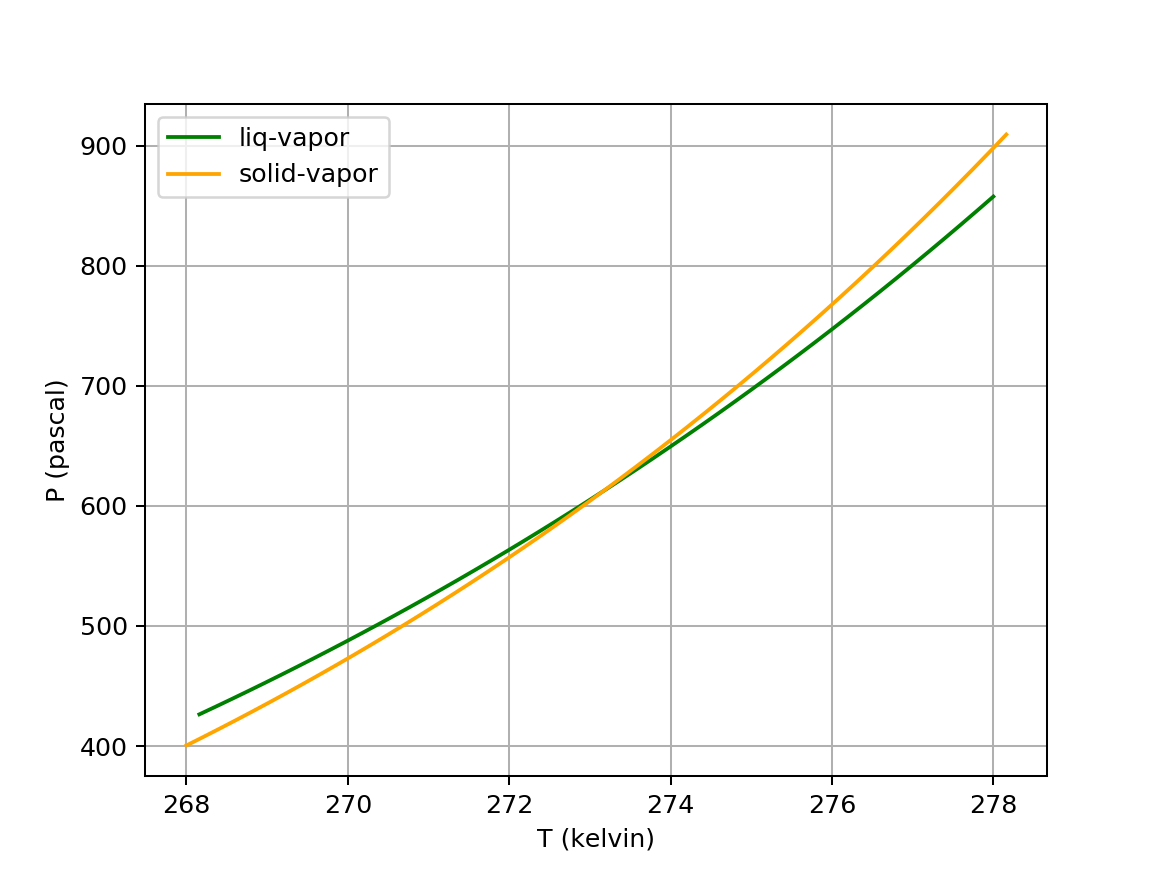

In [11]:
# Plot the solid->vapor, liquid->vapor phase boundaries
### BEGIN SOLUTION
plt.figure()
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.plot(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()
### END SOLUTION

### Pause for analysis
Using the zoom feature, double-check that the intersection really does occur at water's triple point, $T_3=273.16 \ K$ and $P_3 = 612 \ Pa$. 

### Applying Raoult's Law to the Clausius-Clapeyron curve

Use the cell below to calculate the mole fraction of *water*, $\chi_{H_2O}$, in a solution containing 0.5 molal B (see Eq. (1). The number you get should be just shy of 1, since 0.5 molal B is a pretty dilute solution. Once you have $\chi_{H_2O}$, plot the pressure of the two phase boundaries you got previously, but add on the Raoult-corrected pressure too, with appropriate legends. Use a dashed line for the Raoult result, something like

    plt.plot(T_lv,P_lv*chiH2O,color='green',label='liq-vapor',linestyle='dashed')


0.9910802775024778 dimensionless


<IPython.core.display.Javascript object>


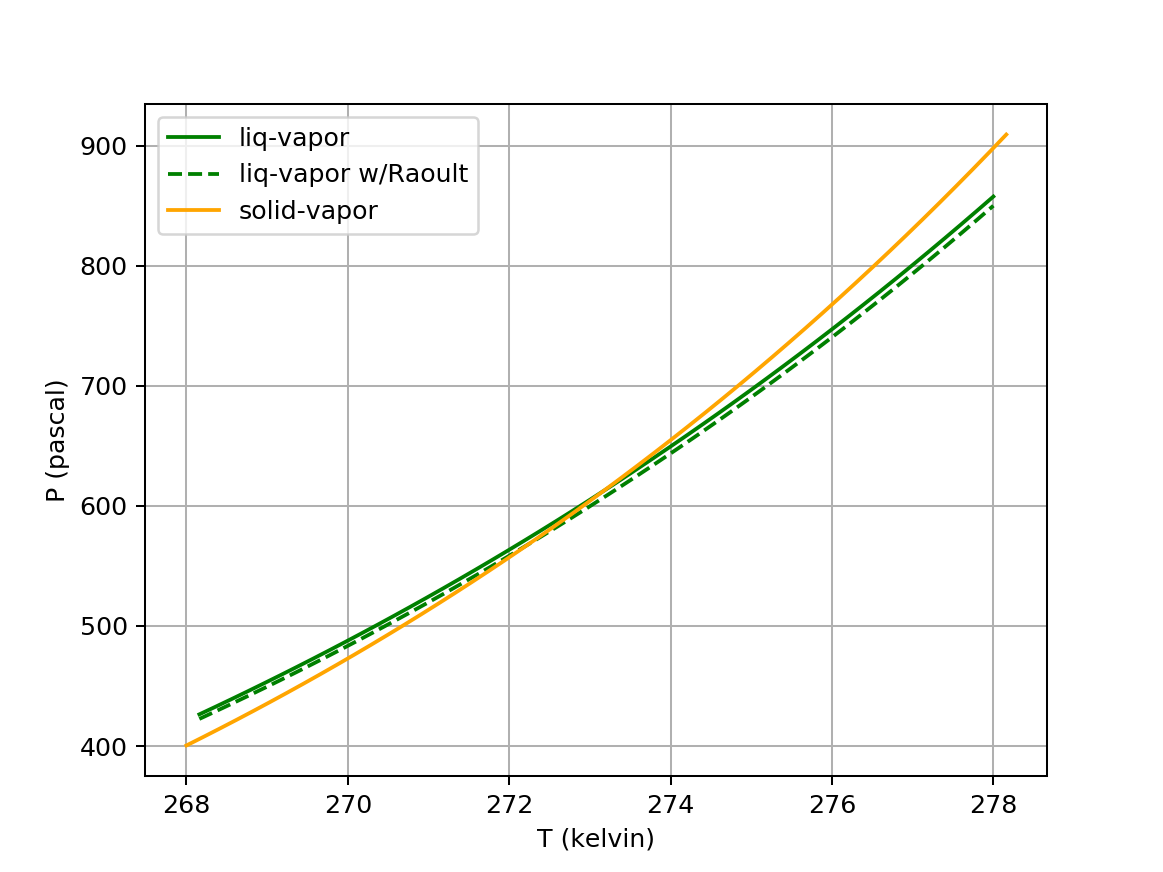

In [15]:
# Create the variable b = 0.5 mol/kg (using AssignQuantity) and use it to calculate the mole fraction of water
### BEGIN SOLUTION
b = AssignQuantity(0.5,'mol/kg')
chiH2O = 1/(1+M*b); print(chiH2O)
### END SOLUTION

# Plot the solid->vapor, liquid->vapor, and Raoult-corrected liquid-> vapor phase boundaries
### BEGIN SOLUTION
plt.figure()
plt.plot(T_lv,P_lv,color='green',label='liq-vapor')
plt.plot(T_lv,P_lv*chiH2O,color='green',label='liq-vapor w/Raoult',linestyle='dashed')
plt.plot(T_sv,P_sv,color='orange',label='solid-vapor')
plt.grid(True)
plt.xlabel('T ('+str(T_sv.units)+')')
plt.ylabel('P ('+str(P_sv.units)+')')
plt.legend()
### END SOLUTION

### Predicting freezing point depression using the Raoult method
After zooming in a bit on your graph, identify $T_{Raoult}$, the temperature at which your Raoult curve intersects the ice-vapor curve. Then use the cell below to calculate $\Delta T_F$ (see Eq. 3).

In [16]:
### BEGIN SOLUTION
TRaoult = AssignQuantity(272.24,'K')
DT = TRaoult - T3; print(DT)
### END SOLUTION

-0.9200000000000159 kelvin


### Using Blagden's Law

In the cell below,
1. Calculate the value of $K_A$ using Eq. (5); remember that for water, $\Delta H_{fus}=6 \ kJ/mol$. Report your result in units kg K /mol.
1. Use Blagden's Law, Eq. (4), to predict $\Delta T_F$ of water in a the same solution we considered above ($b=0.5 \ mol/kg$, $i=2$). You should get a value for $\Delta T_F$ close to what you got before -- if not, figure out what's wrong.
1. Use Blagden's Law to predict $\Delta T_F$ of water in a *saturated* sodium chloride solution ($b=6.2 \ mol/kg$, $i=2$. 
1. Why consider a saturated sodium chloride solution? For one, it tells you how cold it can for salting roads to have the intended effect, i.e., to melt the ice on the roads! To convert $\Delta T_F$ to Fahrenheit, use 

       print((DT+T3).to('degree_Fahrenheit'))
    


In [28]:
# Finding K_A
# BEGIN SOLUTION
DHfus = AssignQuantity(6,'kJ/mol'); print(DHfus)
K_A = R * M * T3**2/DHfus; print(K_A)
K_A.ito('kg K /mol'); print(K_A)
print(K_A)
### END SOLUTION

# Finding DT when b = 0.5 mol/kg
# BEGIN SOLUTION
b = AssignQuantity(0.5,'mol/kg')
i = 1
DT = -i*K_A*b
print('DT',DT)
### END SOLUTION

# Finding DT when b = 6.2 mol/kg
# BEGIN SOLUTION
b = AssignQuantity(6.2,'mol/kg'); print('b=', b)
#b = AssignQuantity(360,'g/kg')/AssignQuantity(58,'g/mol'); print('b=', b)
i = 2
DT = -i*K_A*b
print('DT=',DT)
### END SOLUTION

# Converting to F
# BEGIN SOLUTION
print((DT+T3).to('degree_Fahrenheit'))
### END SOLUTION

6 kilojoule / mole
1861081.8896352 gram * joule * kelvin / kilojoule / mole
1.8610818896352 kelvin * kilogram / mole
1.8610818896352 kelvin * kilogram / mole
DT -0.9305409448176 kelvin
b= 6.2 mole / kilogram
DT= -23.07741543147648 kelvin
-9.521347776657644 degree_Fahrenheit
